In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from scipy import stats

In [2]:
df1 = pd.read_csv('Data\원본\신규가입자합산_2022.csv',index_col=0)
df2 = pd.read_csv('Data\원본\신규가입자합산_2023.csv',index_col=0)
df1.shape

(6, 3)

In [3]:
df2.shape

(6, 3)

In [4]:
#df1['가입건수'] = df1['가입건수'].str.replace(',', '').astype(int)

In [5]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 202207 to 202212
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   가입건수    6 non-null      int64
 1   year    6 non-null      int64
 2   month   6 non-null      int64
dtypes: int64(3)
memory usage: 192.0 bytes


,가입건수,year,month
가입일시,,,
202207,56393,2022,7
202208,53853,2022,8
202209,81574,2022,9
202210,62511,2022,10
202211,36600,2022,11


In [6]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 202307 to 202312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   가입건수    6 non-null      int64
 1   year    6 non-null      int64
 2   month   6 non-null      int64
dtypes: int64(3)
memory usage: 192.0 bytes


,가입건수,year,month
가입일시,,,
202307,42649,2023,7
202308,41346,2023,8
202309,61111,2023,9
202310,66836,2023,10
202311,21743,2023,11


In [7]:
#df2['가입일시'] =df2['가입년월']
#df1['가입건수'] = df1['가입 수']


In [8]:
# group_df1 = df1.groupby('가입일시')['가입건수'].sum()
# group_df1 = pd.DataFrame(group_df1)
# group_df1

In [9]:
# group_df2 = df2.groupby('가입일시')['가입건수'].sum()
# group_df2 = pd.DataFrame(group_df2)
# group_df2

C:\Users\chane\AppData\Local\Temp\ipykernel_10836\3889398245.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='가입일시', y='가입건수', marker='o',ci=None)


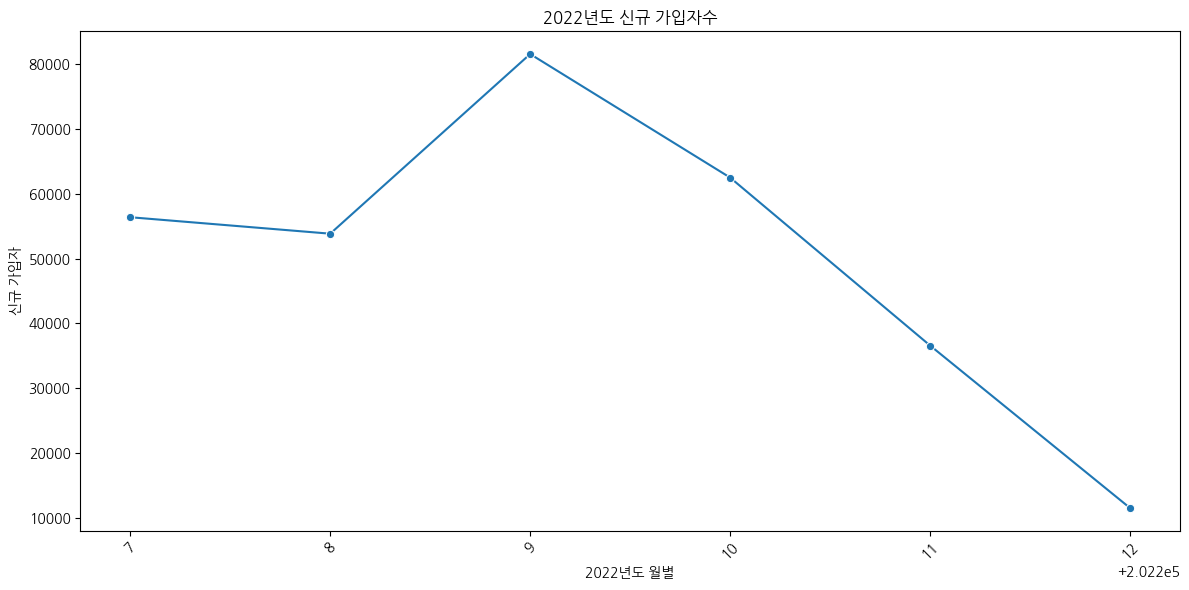

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='가입일시', y='가입건수', marker='o',ci=None)
plt.title('2022년도 신규 가입자수')
plt.xlabel('2022년도 월별')
plt.ylabel('신규 가입자')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\chane\AppData\Local\Temp\ipykernel_10836\2693615684.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df2, x='가입일시', y='가입건수', marker='o',ci=None)


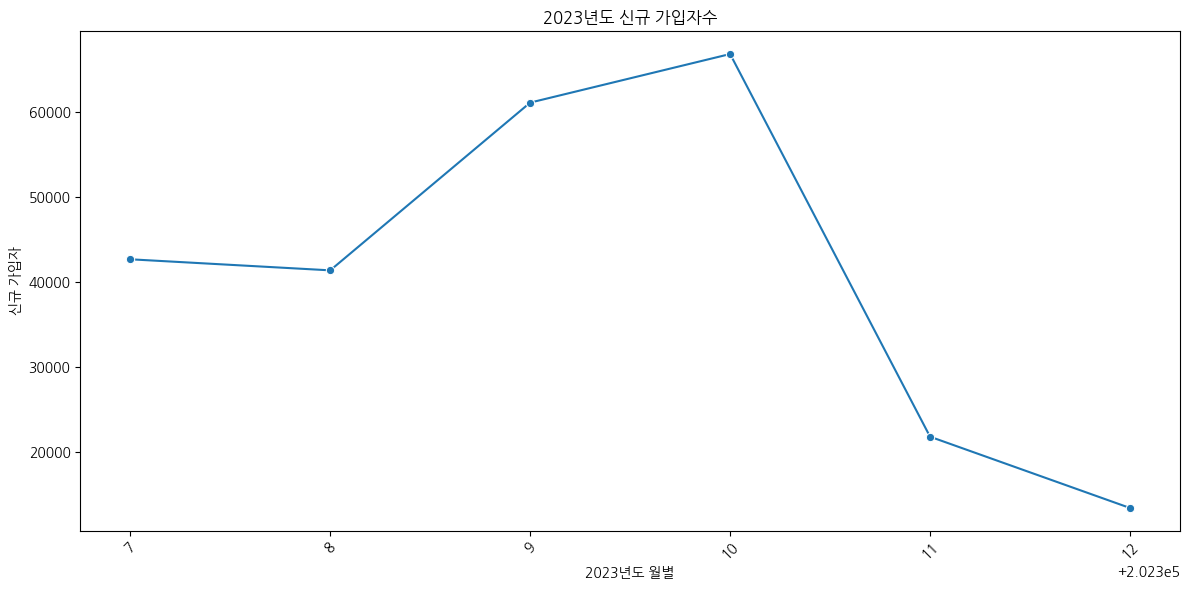

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='가입일시', y='가입건수', marker='o',ci=None)
plt.title('2023년도 신규 가입자수')
plt.xlabel('2023년도 월별')
plt.ylabel('신규 가입자')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# df1['가입일시'] = df1['가입일시'].astype(str)
# df1['month'] = df1['가입일시'].str[4:]
# df1
#df1.to_csv('./신규가입자합산_2022.csv',index=False)

In [13]:
# df2['가입일시'] = df2['가입일시'].astype(str)
# df2['month'] = df2['가입일시'].str[4:]
# df2
#df2.to_csv('./신규가입자합산_2023.csv',index=False)

In [14]:
# group_df1['year'] = '2022'
# group_df2['year'] = '2023'

In [15]:
combined_df = pd.concat([df1, df2])
# combined_df.reset_index(inplace=True)
# combined_df.rename(columns={'index': '가입일시'}, inplace=True)
# combined_df['가입일시'] = combined_df['가입일시'].astype(str)
# combined_df['가입일시'] = combined_df['가입일시'].str[4:]
combined_df
#combined_df.to_csv('신규가입자합산값.csv',index=False)

,가입건수,year,month
가입일시,,,
202207,56393,2022,7
202208,53853,2022,8
202209,81574,2022,9
202210,62511,2022,10
202211,36600,2022,11
202212,11530,2022,12
202307,42649,2023,7
202308,41346,2023,8
202309,61111,2023,9


C:\Users\chane\AppData\Local\Temp\ipykernel_10836\895809322.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_df, x='month', y='가입건수', hue='year', marker='o', ci=None)


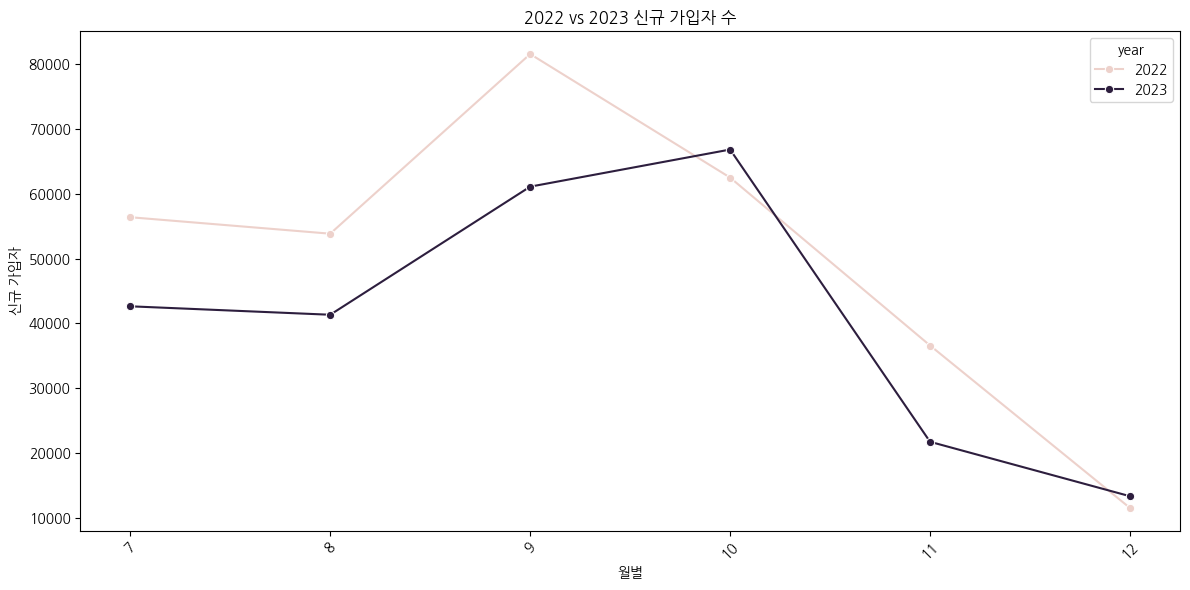

In [16]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=combined_df, x='month', y='가입건수', hue='year', marker='o', ci=None)

plt.title('2022 vs 2023 신규 가입자 수')
plt.xlabel('월별')
plt.ylabel('신규 가입자')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

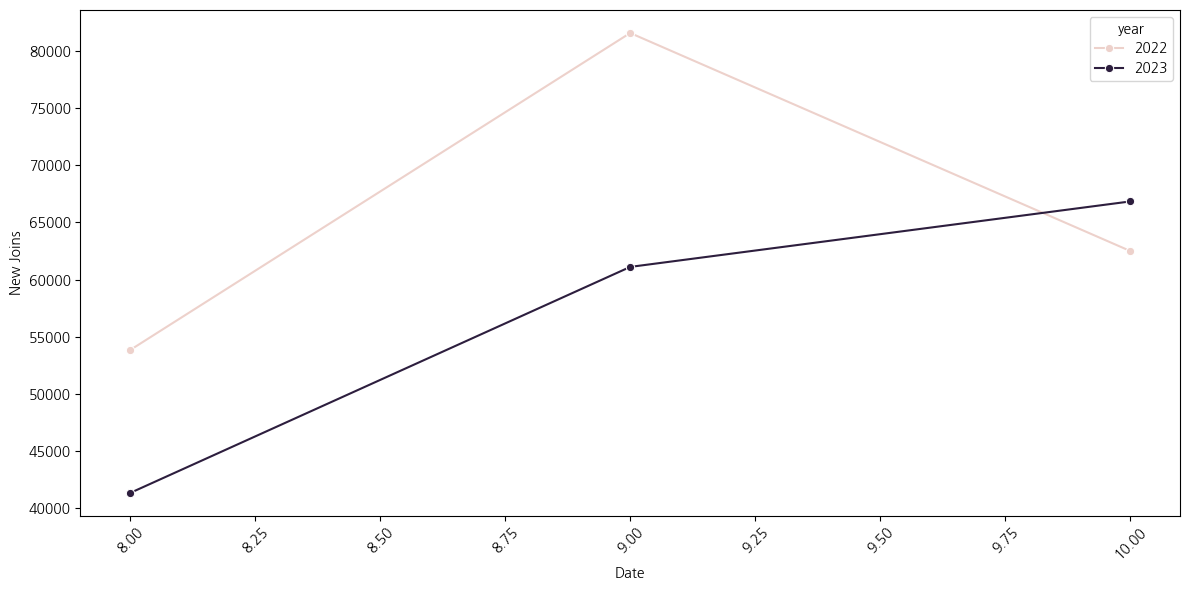

In [17]:
filtered_data = combined_df.query('8 <= month <= 10')
plt.figure(figsize=(12, 6))

# Seaborn의 lineplot 사용
sns.lineplot(data=filtered_data, x='month', y='가입건수', hue='year', marker='o')

# 그래프 꾸미기
plt.xlabel('Date')
plt.ylabel('New Joins')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [18]:
combined_df['가입건수_증가량'] = combined_df.groupby('year')['가입건수'].diff().fillna(0)
combined_df['가입건수_증가량']

가입일시
202207        0.0
202208    -2540.0
202209    27721.0
202210   -19063.0
202211   -25911.0
202212   -25070.0
202307        0.0
202308    -1303.0
202309    19765.0
202310     5725.0
202311   -45093.0
202312    -8399.0
Name: 가입건수_증가량, dtype: float64

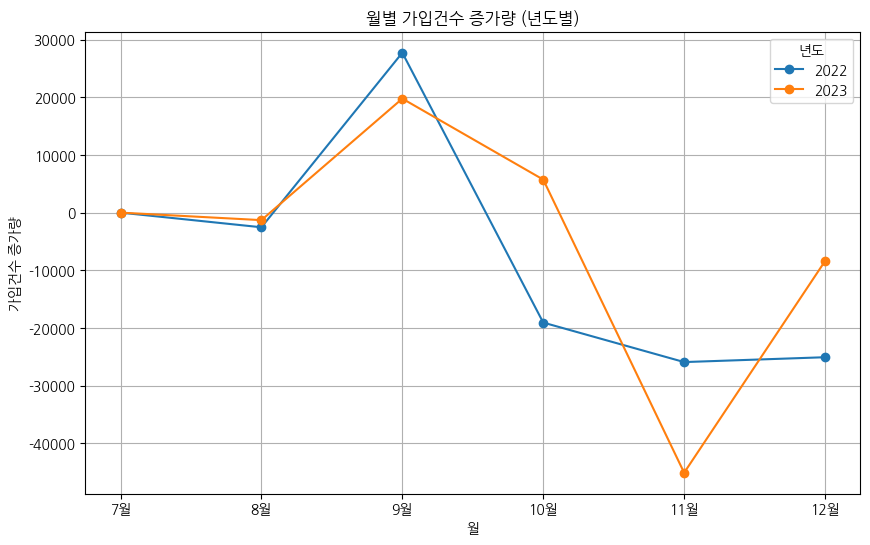

In [19]:
plt.figure(figsize=(10, 6))
for year in combined_df['year'].unique():
    subset = combined_df[combined_df['year'] == year]
    plt.plot(subset['month'], subset['가입건수_증가량'], marker='o', label=f'{year}')

plt.title('월별 가입건수 증가량 (년도별)')
plt.xlabel('월')
plt.ylabel('가입건수 증가량')
plt.xticks(ticks=range(7, 13), labels=[f'{i}월' for i in range(7, 13)])
plt.legend(title='년도')
plt.grid(True)
plt.show()

In [20]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 202207 to 202212
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   가입건수    6 non-null      int64
 1   year    6 non-null      int64
 2   month   6 non-null      int64
dtypes: int64(3)
memory usage: 192.0 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 202307 to 202312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   가입건수    6 non-null      int64
 1   year    6 non-null      int64
 2   month   6 non-null      int64
dtypes: int64(3)
memory usage: 192.0 bytes


In [21]:
df1.rename(columns={'year': '년도', 'month': '월'}, inplace=True)
df2.rename(columns={'year': '년도', 'month': '월'}, inplace=True)

In [22]:
broken_22 = pd.read_csv('Data\원본\고장신고내역(일별)_2207-12.csv')
broken_23 = pd.read_csv('Data\원본\고장신고내역(일별)_2307-12.csv')

In [23]:
broken_22['등록일시'] = pd.to_datetime(broken_22['등록일시'])
broken_23['등록일시'] = pd.to_datetime(broken_23['등록일시'])

In [24]:
broken_22['년도'] = broken_22['등록일시'].dt.year
broken_22['월'] = broken_22['등록일시'].dt.month
broken_22['일'] = broken_22['등록일시'].dt.day
broken_22.head()

,자전거번호,등록일시,고장구분,년도,월,일
0,SPB-30229,2022-07-01 00:44:33,페달,2022,7,1
1,SPB-40134,2022-07-01 00:57:59,페달,2022,7,1
2,SPB-40789,2022-07-01 01:08:25,안장,2022,7,1
3,SPB-50932,2022-07-01 01:09:33,체인,2022,7,1
4,SPB-41175,2022-07-01 01:13:06,안장,2022,7,1


In [25]:
broken_23['년도'] = broken_23['등록일시'].dt.year
broken_23['월'] = broken_23['등록일시'].dt.month
broken_23['일'] = broken_23['등록일시'].dt.day
broken_23.head()

,자전거번호,등록일시,고장구분,년도,월,일
0,SPB-49493,2023-07-01 00:02:28,기타,2023,7,1
1,SPB-34078,2023-07-01 00:08:20,기타,2023,7,1
2,SPB-65202,2023-07-01 00:13:55,타이어,2023,7,1
3,SPB-62031,2023-07-01 00:14:27,타이어,2023,7,1
4,SPB-37479,2023-07-01 00:21:21,타이어,2023,7,1


In [26]:
broken_counts_2022 = broken_22[(broken_22['년도'] == 2022) & (broken_22['월'] >= 7)].groupby(['년도', '월']).size().reset_index(name='고장횟수')
broken_counts_2023 = broken_23[(broken_23['년도'] == 2023) & (broken_23['월'] >= 7)].groupby(['년도', '월']).size().reset_index(name='고장횟수')
broken_counts_2022

,년도,월,고장횟수
0,2022,7,18127
1,2022,8,17345
2,2022,9,24000
3,2022,10,20936
4,2022,11,16124
5,2022,12,9018


In [27]:
merged_2022 = pd.merge(df1, broken_counts_2022, on=['년도', '월'], how='left').fillna(0)
merged_2023 = pd.merge(df2, broken_counts_2023, on=['년도', '월'], how='left').fillna(0)
merged_2022

,가입건수,년도,월,고장횟수
0,56393,2022,7,18127
1,53853,2022,8,17345
2,81574,2022,9,24000
3,62511,2022,10,20936
4,36600,2022,11,16124
5,11530,2022,12,9018


신규가입 고장횟수 상관관계

In [28]:
correlation_2022 = merged_2022[['가입건수', '고장횟수']].corr().iloc[0, 1]
correlation_2023 = merged_2023[['가입건수', '고장횟수']].corr().iloc[0, 1]
print(f"2022년도 가입건수와 고장 횟수 상관관계: {correlation_2022:.2f}")
print(f"2023년도 가입건수와 고장 횟수 상관관계: {correlation_2023:.2f}")

2022년도 가입건수와 고장 횟수 상관관계: 0.98
2023년도 가입건수와 고장 횟수 상관관계: 0.81


In [29]:
def calculate_monthly_increase(df):
    df['가입건수_증가폭'] = df['가입건수'].diff().fillna(0)
    df['고장횟수_증가폭'] = df['고장횟수'].diff().fillna(0)
    return df

In [30]:
monthly_counts_2022 = calculate_monthly_increase(merged_2022)
monthly_counts_2023 = calculate_monthly_increase(merged_2023)

In [31]:
correlation_2022 = monthly_counts_2022[['가입건수_증가폭', '고장횟수_증가폭']].corr().iloc[0,1]
correlation_2023 = monthly_counts_2023[['가입건수_증가폭', '고장횟수_증가폭']].corr().iloc[0,1]

In [32]:
print(f"2022년도 월별 증가폭 상관관계: {correlation_2022:.2f}")
print(f"2023년도 월별 증가폭 상관관계: {correlation_2023:.2f}")

2022년도 월별 증가폭 상관관계: 0.98
2023년도 월별 증가폭 상관관계: 0.63


In [33]:
statistic, p_value_2022 = stats.ttestind(monthly_counts_2022['가입건수'], monthly_counts_2022['고장횟수'])
statistic, p_value_2023 = stats.ttestind(monthly_counts_2023['가입건수'], monthly_counts_2023['고장횟수'])
print("2022년 가입건수-고장횟수 상관계수:", corr_2022)
print("2022년 가입건수-고장횟수 p-value:", p_value_2022)
print("2023년 가입건수-고장횟수 상관계수:", corr_2023)
print("2023년 가입건수-고장횟수 p-value:", p_value_2023)

2022년 가입건수-고장횟수 상관계수: 0.9829751769195405
2022년 가입건수-고장횟수 p-value: 0.00043229962485566675
2023년 가입건수-고장횟수 상관계수: 0.8076890197680174
2023년 가입건수-고장횟수 p-value: 0.05191910184662714


In [34]:
statistic, p_value_2022 = stats.ttestind(monthly_counts_2022['가입건수_증가폭'], monthly_counts_2022['고장횟수_증가폭'])
statistic, p_value_2023 = stats.ttestind(monthly_counts_2023['가입건수_증가폭'], monthly_counts_2023['고장횟수_증가폭'])
print("2022년 가입건수_증가폭-고장횟수 증가폭 상관계수:", corr_2022)
print("2022년 가입건수_증가폭-고장횟수 증가폭 p-value:", p_value_2022)
print("2023년 가입건수_증가폭-고장횟수 증가폭 상관계수:", corr_2023)
print("2023년 가입건수_증가폭-고장횟수 증가폭 p-value:", p_value_2023)

2022년 가입건수_증가폭-고장횟수 증가폭 상관계수: 0.9790936755983042
2022년 가입건수_증가폭-고장횟수 증가폭 p-value: 0.0006510427903864903
2023년 가입건수_증가폭-고장횟수 증가폭 상관계수: 0.6259157766297325
2023년 가입건수_증가폭-고장횟수 증가폭 p-value: 0.18373402203980005
